# ADA final exam (Fall 2021)

This exam consists of 2 parts.
The first part has 3 tasks.
The second part has 2 tasks.
The two parts are completely independent of each other.

## Important: The data used for this exam **is not entirely real.** A great deal of it has been artificially created or modified. Conclusions drawn from this data have no real link to reality!

In [1]:
%matplotlib inline

# General
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For graph-related stuff
import networkx as nx

# For regression analyses and statistical tests
import scipy.stats as stats
import statsmodels.stats
import statsmodels.formula.api as smf

# For classification
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Part 1 — Faculty hiring network

For the first part of the exam, you will analyze data from a faculty hiring network. After completing their Ph.D., researchers who want to pursue an academic career must compete for relatively few permanent positions (as “faculty”, i.e., professors) in a highly competitive job market. You will analyze a directed graph that captures the dynamics of this hiring process in the United States:


- Each node $u$ in this graph represents a different American university.
- For each university, we also provide a score that captures how highly  this university is ranked (e.g., Stanford University is ranked more highly than the University of Alabama). The higher the score, the more highly ranked the university.
- Each directed edge $(u,v)$ in this graph represents a hiring decision where someone who did their Ph.D. at university $u$ subsequently was hired by university $v$. Each edge is also associated with a gender label, which specifies if the person hired was a man (M) or a woman (F).
- Note that, when multiple researchers were trained at a given university $u$ and subsequently hired by university $v$, there will be multiple edges pointing from $u$ to $v$, each of which corresponds to a different person.


## Files (in the `./data/part-1/` folder)

- `nodelist.tsv` a tab-separated file containing the nodes of the graph. Recall that each node represents a different university. The file has these columns:
    - `u` — the node index;
    - `score` — the rank of the university (the higher the better);
    - `name` — the name of the university.

- `edgelist.tsv` a tab-separated file containing the edges of the graph. Recall that each edge represents a hiring decision. The file has columns:
    - `u` — the source university, where the person got their Ph.D.;
    - `v` — the target university, where the person was hired;
    - `gender` — the gender of the person.


### Task 1 — (20 points)

1. Using the above files, create the directed graph representing the hiring network using `networkx`.
Each node should contain the attributes `score` and `name`, and each edge should contain the attribute `gender`.
Print the total numbers of nodes and edges in the graph.

2. Create a plot that allows you to easily visualize **(a)** what fraction of all researchers in the graph are hired by the $N$ universities that hire the most; and  **(b)** what fraction of all researchers in the graph are trained by the $N$ universities whose students get hired the most.
Here, $N$ could be any number between 1 and the number of universities.

3. **/Multiple choice:/** Which centrality metric(s) is/are illustrated in the plot you made for the previous subtask? Select all that apply from the list below and **justify your answer.**
    1. Betweenness centrality
    2. In-degree centrality
    3. Out-degree centrality
    4. PageRank centrality

4. **/True or false:/** Search engines such as Google have historically used PageRank centrality as a signal to determine the importance of pages on the Web. Is the following statement **true** or **false**? Justify. **"In the faculty hiring network, PageRank centrality is positively correlated with university score, that is, universities with higher scores are more likely to also have higher PageRank centrality."**


In [87]:
#1
# Load the data
data_folder = './data/part-1/'
nodes = pd.read_csv(data_folder + 'nodelist.tsv', sep='\t')
edges = pd.read_csv(data_folder + 'edgelist.tsv', sep='\t')
#print(nodes.head())
#print(edges.head())

# Create the directed graph
facultyG =nx.from_pandas_edgelist(edges, 'u', 'v', edge_attr=['gender'], create_using= nx.MultiDiGraph())
nx.set_node_attributes(facultyG, nodes['name'].to_dict(), 'Name' )
nx.set_node_attributes(facultyG, nodes['score'].to_dict(), 'Rank' )

# Confirm that edges have the attribute gender
print(facultyG[1])
# Confirm that nodes have the attribute name and rank
print(facultyG.nodes[1])

# Print the total number of nodes and edges in the graph
print(facultyG)

{1: {0: {'gender': 'F'}, 1: {'gender': 'F'}, 2: {'gender': 'F'}, 3: {'gender': 'M'}, 4: {'gender': 'M'}, 5: {'gender': 'F'}, 6: {'gender': 'F'}, 7: {'gender': 'F'}, 8: {'gender': 'M'}}, 2: {0: {'gender': 'F'}, 1: {'gender': 'F'}, 2: {'gender': 'M'}, 3: {'gender': 'M'}, 4: {'gender': 'F'}, 5: {'gender': 'F'}, 6: {'gender': 'F'}, 7: {'gender': 'M'}, 8: {'gender': 'F'}}, 3: {0: {'gender': 'F'}, 1: {'gender': 'M'}, 2: {'gender': 'M'}, 3: {'gender': 'M'}, 4: {'gender': 'F'}, 5: {'gender': 'F'}, 6: {'gender': 'M'}, 7: {'gender': 'M'}, 8: {'gender': 'F'}, 9: {'gender': 'F'}, 10: {'gender': 'M'}, 11: {'gender': 'M'}, 12: {'gender': 'M'}, 13: {'gender': 'F'}}, 5: {0: {'gender': 'M'}, 1: {'gender': 'M'}}, 6: {0: {'gender': 'M'}, 1: {'gender': 'M'}, 2: {'gender': 'M'}, 3: {'gender': 'M'}, 4: {'gender': 'M'}, 5: {'gender': 'M'}, 6: {'gender': 'F'}}, 7: {0: {'gender': 'M'}, 1: {'gender': 'F'}, 2: {'gender': 'M'}, 3: {'gender': 'F'}, 4: {'gender': 'M'}, 5: {'gender': 'F'}, 6: {'gender': 'F'}, 7: {'g

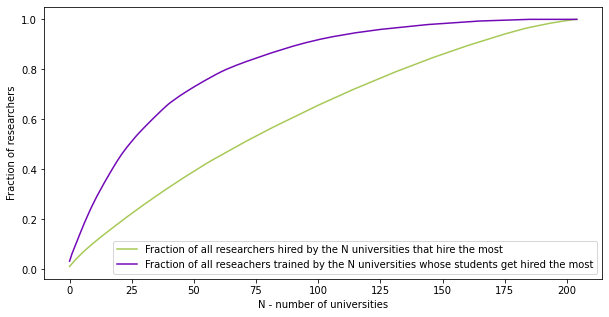

In [68]:
# 2. Create a plot that allows you to easily visualize a) what fraction of all researchers in the graph are hired by the N universities that hire 
# the most; and  b) what fraction of all researchers in the graph are trained by the N universities whose students get hired the most.
# Here, N could be any number between 1 and the number of universities.

# a) represent in-degree for each node 
# b) represent out-degree for each node
indegree = []
outdegree = []
for node in facultyG.nodes:
    indegree.append(len(list(facultyG.predecessors(node))))
    outdegree.append(len(list(facultyG.successors(node))))
indegree = np.array(indegree)
outdegree = np.array(outdegree)

# Get fractions of indegree and outdegree
fraction_indegree = np.array(sorted(indegree/sum(indegree), reverse=True)).cumsum()
fraction_outdegree = np.array(sorted(outdegree/sum(outdegree), reverse=True)).cumsum()

plt.figure(figsize=(10,5))
plt.plot(fraction_indegree, label="Fraction of all researchers hired by the N universities that hire the most", color="#a7c957")
plt.plot(fraction_outdegree, label="Fraction of all reseachers trained by the N universities whose students get hired the most", color="#7209b7")
plt.ylabel("Fraction of researchers")
plt.xlabel("N - number of universities")
plt.legend()


3. **/Multiple choice:/** Which centrality metric(s) is/are illustrated in the plot you made for the previous subtask? Select all that apply from the list below and **justify your answer.**
    1. Betweenness centrality
    2. In-degree centrality
    3. Out-degree centrality
    4. PageRank centrality

In-degree centrality (researchers hired by university) and Out-degree centrality (researchers trained by university)

4. **/True or false:/** Search engines such as Google have historically used PageRank centrality as a signal to determine the importance of pages on the Web. Is the following statement **true** or **false**? Justify. **"In the faculty hiring network, PageRank centrality is positively correlated with university score, that is, universities with higher scores are more likely to also have higher PageRank centrality."**

False - PageRank depends on out-degree and in-degree of nodes. PageRank centrality is positively correlated with high in and out degrees. Universities with a high score have typically a high out-degree, researchers trained in this university are easily hired elsewhere. But they do not have such an important in-degree. Therefore, the university score is not necessarily related with a higher PageRank centrality.

### Task 2 — (15 points)

Each hiring decision $(u,v)$ connects two different universities with different scores.

1. Divide the universities into quintiles according to their scores ($Q_1$ to $Q_5$, where $Q_5$ contains the highest-ranked universities, i.e., those with the highest scores). Create a succinct plot that captures, for each pair of quintiles ($Q_i$, $Q_j$), what fraction of people in the dataset who got their Ph.D. from a university in $Q_i$ were hired by a university in $Q_j$.


2. **/Multiple choice:/** What does the plot made in the previous subtask reveal about the faculty hiring process? Select one of the following options and justify your answer.
    1. Ph.D. graduates who are hired as professors usually go to universities that are better than the universities where they were trained.
    2. Ph.D. graduates who are hired as professors usually go to universities that are around the same or worse than the universities where they were trained.

3. **/True or false:/** Let $E$ be the set of edges from the hiring network, and let $X$ be defined as follows:
$$X = \frac{|(u,v) \in E : u \in Q_1 \text{ and } v \in Q_5 |}{{|(u,v) \in E : u \in Q_1|}}$$
 *Thinking critically about the data that was given to you,* is the following statement **true** or **false**? Justify your answer. **"If I get my Ph.D. in a 1st-quintile university, I have a chance of around X * 100%  of getting a job in a 5th-quintile university."**


---
**Hints:**
- [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) makes splitting data into quantiles easy!


Text(0.5, 1.0, 'Fraction of people who got their Ph.D. from a university in Qi and were hired by a university in Qj')

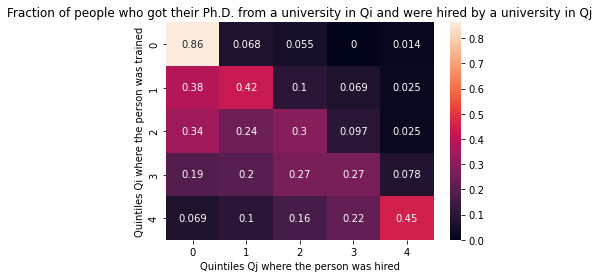

In [118]:
# 1. Divide the universities into quintiles according to their scores (Q_1 to Q_5, where Q_5 contains the highest-ranked universities)

nodes = nodes.set_index(nodes['u'])
quintiles = pd.qcut(nodes['score'], 5, labels=False)
quintiles_dict = dict(quintiles)

#  Create a succinct plot that captures, for each pair of quintiles (Q_i, Q_j), what fraction of people in the dataset who got their Ph.D. 
# from a university in Q_i were hired by a university in Q_j.
matrix_quantiles = np.zeros((5,5), dtype=float)
#print(facultyG.edges)

#Count number of people who got their Ph.D in Qi and were hired in Qj = count number of edges from any university in Qi to any university in Qj
for u,v,k in facultyG.edges: 
        matrix_quantiles[quintiles_dict[u], quintiles_dict[v]] += 1 
#print(matrix_quantiles)

matrix_fraction_quantiles = matrix_quantiles.T / matrix_quantiles.sum(axis=1)
#print(matrix_fraction_quantiles)

sns.heatmap(matrix_fraction_quantiles.T, annot=True)
plt.ylabel("Quintiles Qi where the person was trained")
plt.xlabel("Quintiles Qj where the person was hired")
plt.title("Fraction of people who got their Ph.D. from a university in Qi and were hired by a university in Qj")


2. **/Multiple choice:/** What does the plot made in the previous subtask reveal about the faculty hiring process? Select one of the following options and justify your answer.
    1. Ph.D. graduates who are hired as professors usually go to universities that are better than the universities where they were trained.
    2. Ph.D. graduates who are hired as professors usually go to universities that are around the same or worse than the universities where they were trained.

Option 2 is correct, the left side of the diagonal is brighter highlitinh the fact that researchers are hired by universities from the same quantile or under. For example, the middle line of the matrix show that people who were trained by a university from quintile q3 are mostly hired by universities from quintile, q3 (column 2), q2 (column 1) or q1 (column 0)

3. **/True or false:/** Let $E$ be the set of edges from the hiring network, and let $X$ be defined as follows:
$$X = \frac{|(u,v) \in E : u \in Q_1 \text{ and } v \in Q_5 |}{{|(u,v) \in E : u \in Q_1|}}$$
 *Thinking critically about the data that was given to you,* is the following statement **true** or **false**? Justify your answer. **"If I get my Ph.D. in a 1st-quintile university, I have a chance of around X * 100%  of getting a job in a 5th-quintile university."**

False, we only have information about researchers who got hired by any universities in this dataset. The chance of getting a job also depends on every other researchers who did not get hired and those are not represented by edges in our graph or by the matrix X.

### Task 3 — (25 points)

Let the "source university" of a person be the university at which the person got their Ph.D., and let their "target university" be the university at which they were hired after their Ph.D.


1. For each hiring decision $(u, v)$, let the score gain ($d$) be defined as the difference between the scores of the target university and the source university (target university score minus source university score; see hint for example). Calculate the average difference for men ($\bar{d_{M}}$) and for women ($\bar{d_{F}}$) in the dataset. Determine whether the difference between these two averages ($\bar{d_{M}}$ and $\bar{d_{F}}$) is statistically significant.

2. **/True or false:/** Is the following statement **true** or **false**? Justify your answer. **"The results you obtained in Task 3.1 do not refute the hypothesis that women are disadvantaged in the faculty hiring process."**

3. For each quintile $Q$ from Task 2.1, calculate the following: **(a)** the percentage of women among hiring decisions $(u, v)$ with $u \in Q$ ; and **b)** the average score gain for hiring decisions $(u, v)$ with $u \in Q$.

4. **/Discuss:/** Considering the results obtained in Task 3.3, why is comparing the average score gain for men ($\bar{d_{M}}$) and women ($\bar{d_{F}}$) insufficient for determining the causal effect of gender on score gain?

5. Use `statsmodels` to run a linear regression where hiring decisions (edges of the hiring network) are the data points, gender and source-university score are the predictors, and score gain is the outcome. Report the summary of your model.

6. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"The results you obtained in Task 3.5 suggest that academic hiring decisions are unfair to women."**

---
**Hint** — The university with the best score is Stanford University (score 100), and the university with the 10th best score is the University of Washington (score 95.26). If someone was trained at Stanford and then got a job at the University of Washington, their score gain is $95.26 - 100 = -4.74$.

In [175]:
# 1
scores_dict = nx.get_node_attributes(facultyG, "Rank")
gender_dict = nx.get_edge_attributes(facultyG, "gender")
print("Nodes:",scores_dict)
print("Edges:",gender_dict)

# Calculate score for men and women separately
scores = []
score_gains_m = []
score_gains_w = []

for u,v,k in facultyG.edges: 
    # difference between the scores of the target university and the source university
    if u != 205 and v != 205:
        score = scores_dict[v] - scores_dict[u]
        scores.append(score)
        
        if gender_dict[(u,v,k)] == 'F':
            score_gains_w.append(score)
        elif gender_dict[(u,v,k)] == 'M':
            score_gains_m.append(score)
print("\n")
print("Score gains - Men:",score_gains_m)
print("Score gains - Women:",score_gains_w)

# Calculate averages of score_gain
average_scoregain_w = sum(score_gains_w) / len(score_gains_w)
average_scoregain_m = sum(score_gains_m) / len(score_gains_m)
print("\n")
print("The average of score gains for women is", average_scoregain_w, "while the avergae of score gains for men is", average_scoregain_m)

# Determine if the difference is statistically significant with a t-test
# Ho, the null hypothesis states that both averages are equal or not statistically different
stats.ttest_ind(score_gains_m, score_gains_w)
print("\n")
print("The p-value of 1% states that the difference between men and women averages is significant at the level of 5%")

Nodes: {1: 99.95666540274092, 2: 99.30122961919722, 3: 98.36953577812685, 5: 96.71740425762418, 6: 96.18113861654297, 7: 96.15947131791344, 8: 95.80196089052598, 9: 95.2169438275283, 10: 93.93315638372783, 11: 93.55939548236822, 12: 92.91479334813933, 13: 92.30269216185472, 14: 91.55517035913547, 15: 91.33308054818264, 16: 91.0134878933969, 17: 90.67764476463896, 18: 89.33427224960728, 20: 87.77964357293754, 21: 87.31921347705973, 22: 87.0321217702183, 23: 86.96170304967227, 24: 86.6096094469422, 25: 86.07876063051837, 26: 85.68874925518661, 27: 85.29873787985483, 28: 85.20123503602187, 29: 84.68663669357022, 30: 81.70196630735063, 31: 80.97069497860355, 32: 80.67818644710471, 33: 80.5644331292996, 36: 79.70857483343265, 37: 79.29147933481391, 38: 79.23189426358269, 42: 76.07388548832674, 46: 71.49125182817832, 49: 69.19451817344672, 50: 67.95406532690536, 54: 64.47646389686366, 56: 63.37684849141433, 57: 63.26851199826661, 60: 60.90677644764638, 61: 60.59260061751801, 63: 59.785493743

2. **/True or false:/** Is the following statement **true** or **false**? Justify your answer. **"The results you obtained in Task 3.1 do not refute the hypothesis that women are disadvantaged in the faculty hiring process."**

True, results from 3.1 refute the hypothesis that men and women are equally treated in the faculty hiring process. But more experiments are needed to determine if women are disadvantaged. There might be some confounders influencing the result.

In [171]:
# 3. For each quintile Q from Task 2.1, calculate the following: **(a)** the percentage of women among hiring decisions (u, v) with u in Q
# and b) the average score gain for hiring decisions (u, v) with u in Q.
nodes = nodes.set_index(nodes['u'])
quintiles = pd.qcut(nodes['score'], 5, labels=False)
quintiles_dict = dict(quintiles)

gender_dict = nx.get_edge_attributes(facultyG, "gender")

nb_women = np.zeros((1,5), dtype=float)
tot_per_q = np.zeros((1,5), dtype=float)
score_gains = np.zeros((1,5), dtype=float)

for u,v,k in facultyG.edges:
    # number of hiring decisions involving women per quintile
    if gender_dict[(u,v,k)] == 'F':
        nb_women[:, quintiles_dict[u]] += 1

    # sum of average score per quintile
    if u != 205 and v != 205:
        score = scores_dict[v] - scores_dict[u]
        score_gains[:, quintiles_dict[u]] += score

    # total number of hiring decisions per quintile
    tot_per_q[:, quintiles_dict[u]] += 1 

pct_women = nb_women / tot_per_q * 100
print("Percentage of women among hiring decisions per quintile (in %):", pct_women)

average_scoregain = score_gains / tot_per_q
print("Average score gain for hiring decisions:", average_scoregain)

Percentage of women among hiring decisions per quintile (in %): [[10.95890411 20.         29.91689751 40.22191401 51.12268142]]
Average score gain for hiring decisions: [[  2.60586368  -1.61133606 -13.11854398 -22.73445816 -27.21090483]]


4. **/Discuss:/** Considering the results obtained in Task 3.3, why is comparing the average score gain for men ($\bar{d_{M}}$) and women ($\bar{d_{F}}$) insufficient for determining the causal effect of gender on score gain?

Because of the big differences of average score gain between quantiles and the big differences in the proportion of women hired, it is insufficient to simply compare the overall average score gain. 

The score (or to which quintile an university belong) is likely to be a counfounder in advantaging men over women in the hiring process

In [186]:
# 5. Use `statsmodels` to run a linear regression where hiring decisions (edges of the hiring network) are the data points, 
# gender and source-university score are the predictors, and score gain is the outcome. Report the summary of your model.

hiring_decisions = []
scores_dict = nx.get_node_attributes(facultyG, "Rank")

for u,v,k in facultyG.edges:
    if u != 205 and v != 205:
        hiring_decisions.append({
            "gender": gender_dict[(u,v,k)] == "F", 
            "source_university_score": scores_dict[u],
            "score_gain": scores_dict[v] - scores_dict[u]
        })
hiring_decisions_df = pd.DataFrame(hiring_decisions)

linearreg = smf.ols(formula='score_gain ~ gender + source_university_score', data=hiring_decisions_df)
result = linearreg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             score_gain   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     117.2
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           2.68e-50
Time:                        15:58:45   Log-Likelihood:                -20244.
No. Observations:                4370   AIC:                         4.049e+04
Df Residuals:                    4367   BIC:                         4.051e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

6. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"The results you obtained in Task 3.5 suggest that academic hiring decisions are unfair to women."**

False. The coefficient associated with gender has a p-value of 0.802 which is way above the alpha level of 0.05. Therefore, gender does not significantly contribute in predicting the score gain after controlling for the university of origin.

## Part 2 — Tennis interviews

For the second part of the exam, you will work with text data extracted from questions asked during post-match tennis interviews and from
TV commentary done during the tennis match.


Examples of interview questions:

> That last set seemed like a faultless performance. Is that the way you saw it?

> How disappointing is that loss for you?

> As a spectator, would you rather watch a guy with big aces or a match with lots of rallies?

Example of commentary text:

>  Serena is desperate to shake herself into action. She lets out an almighty shriek when she goes 30-15 up, but Azarenka responds with a brilliant forehand. The level of Williams' scream goes up and up during the next point, and she lets out another roar when she belts a forehand cross court win the point. She wraps the game up next time round, and she looked something like back to her best there!


## Files (in the `data` folder)

- `questions.tsv.gz` a tab-separated compressed file containing interview questions
and some metadata. We refer to this dataset as the "questions dataset."
Each row contains a question made to a specific player after a match.
The file has the following columns:
    - `questions` — the text of the question asked; **Note that you will never be asked to use this row; it is merely meant to help you understand the data better**.
    - `gender` — the gender of the player;
    - `ranking` — the ranking of the player at the time;
    - `similarity` — this column will be explained later in the exam.

- `commentary.tsv.gz` a tab-separated compressed file containing TV commentary done during
the tennis match. We refer to this dataset as the "commentary dataset." Each line contains
a piece of commentary done in a tennis match.
The file has the following columns:
    - `commentary` — the text of the commentary; **Note that you will never be asked to use this row; it is merely meant to help you understand the data better**.
    - `gender` — the gender of the players in the match;

- `TFIDF.npz`, a file containing 2D numpy arrays saved in the `.npz` format that
will be used in Task 4.

Both datasets are **balanced regarding gender,** i.e., they have the same number of rows about men as about women.


Commentary text, as well as interview questions, have been preprocessed to make your life easier, as follows:

- We replaced all words starting with upper-case letters with the special string `'--ENT--'`. This was done to remove personal names (e.g., Alice, Bob), which could help predict whether the text is associated with a male or a female tennis player.
- We removed the first word in each sentence. This was done because, for the first word of each sentence, it is difficult to know whether it is a personal name or simply a regular word.
- We replaced all gendered pronouns in the text (he/him/his and she/her/hers) with the special string `'--PRON--'`. This, too, was done because these words would make it easy to predict whether the text is associated with a male or a female tennis player.
- We removed punctuation and stop words (to reduce the dimensionality of the data).

The above example commentary text thus appears as follows in the data provided to you:

> desperate shake action lets almighty shriek --PRON-- goes 30 15 --ENT-- responds brilliant forehand level --ENT-- scream goes point --PRON-- lets roar --PRON-- belts forehand cross court win point wraps game time round --PRON-- looked like --PRON-- best

We also provide some code for loading and displaying the dataset:

In [187]:
#  Part 2 ! PROVIDED CODE !

questions = pd.read_csv("./data/part-2/questions.tsv.gz", sep="\t", compression="infer")
commentary = pd.read_csv("./data/part-2/commentary.tsv.gz", sep="\t", compression="infer")


### Task 4  (20 points)

Your goal now is to investigate whether there is gender bias in the questions being asked to female vs. male players, i.e., whether men vs. women are asked different questions on average. You start your analysis with a classification framing.


To make your life easier, we already provided a TF-IDF matrix for each dataset (`commentary.tsv.gz` and `questions.tsv.gz`) and with code to load these matrices (which are numpy arrays).

- Each row in each matrix $M$ corresponds to a row in the corresponding dataframe, i.e., each row corresponds to a different question or a different piece of TV commentary.
- Each column in each matrix corresponds to a different word from the vocabulary.
- Each position $(i,j)$ in the matrix contains the TF-IDF score for word $j$ from the vocabulary in question or commentary $i$. That is, each term $M[i,j]$ corresponds to the term frequency (TF) of word $j$ in text $i$, multiplied by the inverse document frequency (IDF) of word $j$:


$$M[i,j] = \text{TF}(i,j) * \text{IDF}(j)$$


1. **/Multiple Choice:/** Which of the following is the correct way to calculate the term frequency and the inverse document frequency? Justify your answer, explaining what each of the two components should capture.
    - Option A:

    $$\text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option B:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option C:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$

    - Option D:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$



2. Leveraging the matrices described above, train two logistic regression classifiers (one for interview questions, the other for TV commentary) that use the TF-IDF vectors as features to predict the gender of the athletes. You should split each dataset into training and test sets using sklearn (see [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) using parameters `test_size=0.4` and `random_state=42`. You should use sklearn's logistic regression model (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) using parameters `C=10` (which controls regularization) and `max_iter=2000`. For each dataset, train the model on the training set (with 60% of the data) and report the accuracy on the test set (with 40% of the data).

3. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"Based on the outcome of Task 4.2, the text from tennis commentary text is more gender-biased than post-match questions."**

4. The parameter `C` above controls a regularization penalty. The lower `C`, the stronger the regularization penalty (caveat: sklearn’s convention is the reverse of the convention you saw in class, where a *higher* $\lambda$ parameter meant a stronger regularization penalty ). For the questions dataset, re-run the classification task using the same setup as in Task 4.2, but now with `C=2000`. Report the accuracy.

5. **/Discuss:/** Explain why increasing `C` changed the results.


4.1 Option B is correct

- TF should capture the occurrence of a word in a given document — so A and C are ruled out.
- IDF should increase as the word becomes rarer across documents — so B is ruled out.

In [189]:
# 4.2 ! PROVIDED CODE !
tmp = np.load("./data/part-2/TFIDF.npz")
TFIDF_commentary = tmp['commentary']
TFIDF_questions = tmp['questions']

TFIDF_questions

array([[0.60373585, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19567434],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13978562, ..., 0.        , 0.        ,
        0.        ],
       [0.59027928, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [200]:
# Leveraging the matrices described above, train two logistic regression classifiers (one for interview questions, the other for TV commentary) 
# that use the TF-IDF vectors as features to predict the gender of the athletes. You should split each dataset into training and test sets using 
# sklearn (see [sklearn.model_selection.train_test_split]) using parameters `test_size=0.4` and `random_state=42`. 
# You should use sklearn's logistic regression model using parameters `C=10` (which controls regularization) and `max_iter=2000`. 
# For each dataset, train the model on the training set (with 60% of the data) and report the accuracy on the test set (with 40% of the data).

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_questions, X_test_questions, y_train_questions, y_test_questions = train_test_split(TFIDF_questions, questions['gender'],test_size=0.4, random_state=42)

logistic_questions = LogisticRegression(C=10, max_iter=2000)
logistic_questions.fit(X_train_questions,y_train_questions)
y_questions_predicted = logistic_questions.predict(X_test_questions)
print("Accuracy for the classifier based on interview questions:",accuracy_score(y_pred=y_questions_predicted , y_true=y_test_questions))

X_train_commentary, X_test_commentary, y_train_commentary, y_test_commentary = train_test_split(TFIDF_commentary, commentary['gender'],test_size=0.4, random_state=42)

logistic_commentary = LogisticRegression(C=10, max_iter=2000)
logistic_commentary.fit(X_train_commentary,y_train_commentary)
y_commentary_predicted = logistic_commentary.predict(X_test_commentary)
print("Accuracy for the classifier based on TV commentary",accuracy_score(y_pred=y_commentary_predicted , y_true=y_test_commentary))

Accuracy for the classifier based on interview questions: 0.7108333333333333
Accuracy for the classifier based on TV commentary 0.5133333333333333


3. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"Based on the outcome of Task 4.2, the text from tennis commentary text is more gender-biased than post-match questions."**

False, the text from tennis interview questions is more gender-biased because we can predict with a higher accuracy the gender of the player based on the questions asked.

In [201]:
#4. The parameter `C` above controls a regularization penalty. The lower `C`, the stronger the regularization penalty 
# (caveat: sklearn’s convention is the reverse of the convention you saw in class, where a higher lambda parameter meant a stronger regularization 
# penalty ). 
# For the questions dataset, re-run the classification task using the same setup as in Task 4.2, but now with `C=2000`. Report the accuracy.

X_train_questions, X_test_questions, y_train_questions, y_test_questions = train_test_split(TFIDF_questions, questions['gender'],test_size=0.4, random_state=42)

logistic_questions = LogisticRegression(C=2000, max_iter=2000)
logistic_questions.fit(X_train_questions,y_train_questions)
y_questions_predicted = logistic_questions.predict(X_test_questions)
print("Accuracy for the classifier based on interview questions:",accuracy_score(y_pred=y_questions_predicted , y_true=y_test_questions))

Accuracy for the classifier based on interview questions: 0.6891666666666667


5. **/Discuss:/** Explain why increasing `C` changed the results.

Increasing C decreases the regularization penalty. When we increase C, we observe a lower accuracy of the classifier. This is because the classifier with a lower regularization penalty overfits the training data. This is due to the high sparsity of TF-TDIF matrices. Therefore when applying the classifier on the new test data, it is less performant.

### Task 5 — (20 pts)

You will now further inspect whether there is gender bias in the interview questions using an observational study framing. For this task, you will use the column `similarity` provided in the questions dataframe. This column captures how similar each question is to tennis-related text, i.e., a higher score indicates that the question is more about the topic of tennis. In contrast, a lower score means that the question may be personal or about other subjects.

1. Using `statsmodels`, run a linear regression with `similarity` as the outcome and `gender` as the predictor. Report the summary of your model.

2. **/True or false:/** According to the previous analysis, determine if the following statement is **true** or **false** and justify your answer. **"Men are asked questions unrelated to tennis more often than women."**

3. The ranking of players is a potential confounder here. We do not know whether the male and female players in the dataset have similar rankings. In that context, compute the average ranking for men and women. Determine if the difference is statistically significant. Additionally, create a scatter plot showing the relationship between ranking (on the y-axis) and similarity (in the x-axis) and compute Spearman's rank-correlation coefficient between `ranking` and `similarity`.

4. **/True or false:/** Assume that no variable other than `gender` and `ranking` can have any influence on the `similarity` of each question. Based on the analysis of the previous question, is the following statement **true** or **false**? Justify your answer. **"Ranking is not a worrisome confounder for the regression of Task 5.1."**

In [204]:
# 1 
linear = smf.ols(formula='similarity ~ gender', data=questions)
res = linear.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     841.1
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          3.16e-163
Time:                        18:10:04   Log-Likelihood:                 77.527
No. Observations:                3000   AIC:                            -151.1
Df Residuals:                    2998   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3750      0.006     60.804      

2. **/True or false:/** According to the previous analysis, determine if the following statement is **true** or **false** and justify your answer. **"Men are asked questions unrelated to tennis more often than women."**

False - From previous results, the gender has a significant effect on the similarity score. More specifically, if the person is a man, the similarity score will be higher. Therefore, results seem to indicate that men are asked questions more often related to tennis than women

The average ranking of men is 495.20234222511385 while the average ranking of women is 503.6179084073821


Ttest_indResult(statistic=-0.7959498763790183, pvalue=0.42612418722112966)
The p-value of the hypothesis test is 0.43 which is above the alpha level so we cannot reject the null hypothesis. Therefore there are no significant differences between the two average rankings


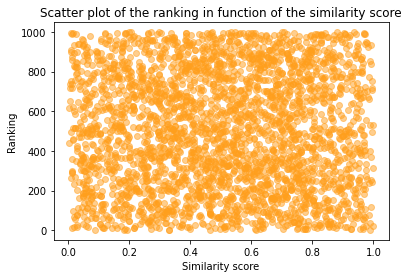

Spearman's correlation between ranking and similarity is equal to SignificanceResult(statistic=-0.00793480965681015, pvalue=0.663973935968952)


In [223]:
# 3. The ranking of players is a potential confounder here. We do not know whether the male and female players in the dataset have similar rankings.
questions.head()

ranking_m = questions.loc[questions['gender'] == 'M']['ranking']
average_ranking_m = ranking_m.mean()
ranking_w = questions.loc[questions['gender'] == 'F']['ranking']
average_ranking_w = ranking_w.mean()
print("The average ranking of men is", average_ranking_m, "while the average ranking of women is", average_ranking_w)

# In that context, compute the average ranking for men and women. Determine if the difference is statistically significant. 
print("\n")
print(stats.ttest_ind(ranking_m, ranking_w))
print("The p-value of the hypothesis test is 0.43 which is above the alpha level so we cannot reject the null hypothesis. Therefore there are no significant differences between the two average rankings")

# Additionally, create a scatter plot showing the relationship between ranking (on the y-axis) and similarity (in the x-axis) 
plt.figure()
plt.scatter(x=questions['similarity'], y=questions['ranking'], color="#ff9f1c", alpha=0.5)
plt.xlabel("Similarity score")
plt.ylabel("Ranking")
plt.title("Scatter plot of the ranking in function of the similarity score")
plt.show()

# Compute Spearman's rank-correlation coefficient between `ranking` and `similarity`.
print("Spearman's correlation between ranking and similarity is equal to",stats.spearmanr(questions['ranking'],questions['similarity']))

4. **/True or false:/** Assume that no variable other than `gender` and `ranking` can have any influence on the `similarity` of each question. Based on the analysis of the previous question, is the following statement **true** or **false**? Justify your answer. **"Ranking is not a worrisome confounder for the regression of Task 5.1."**

True - Ranking is not significantly correlated to the similarity score as shown by the scatter plot and the value of Spearman's correlation. Therefore, ranking is not a counfounder in predicting the similary score with linear regression. 